# Algorithmic Data Science: Lab 3 - Matrices

## Exercise 1

A matrix can be represented as a list of lists, where each internal list is a row of the matrix

In [1]:
matrixA = [[1,3,4],[2,-1,0],[3,7,9]]
matrixB = [[0,6,1],[-1,-1,5],[3,0,-1]]
matrixC = [[2,3],[0,9]]
matrixD = [[1,4,5],[2,3],[1,7,9]]

Write functions to do the following. (Alternatively, you could write a matrix class which is initialised using a list of lists and then create methods for the following).

1. determine whether the input is a valid matrix
2. return the dimensionality of a valid matrix as (m,n) where m is the number of rows and n is the number of columns
3. transpose a matrix
4. add two compatible matrices
5. multiply a matrix by a scalar
6. multiply two compatible matrices using the naive method from the lectures
7. multiply two compatible matrices using Strassen's method (provided the matrices are nxn and n is a power of 2)

In [9]:
import numpy as np

def is_valid(x):
  if all(isinstance(elem, list) for elem in x):
    dims = []
    for r in x:
        dims.append(len(r))
    
    return all(element == dims[0] for element in dims)

def shape(x):
  if is_valid(x):
    return (len(x), len(x[0]))
  else:
    return (len(x), )
  
def transpose(x):
  if is_valid(x):
    x_t = [[0 for i in range(len(x[0]))] for j in range(len(x))]

    for i in range(len(x_t)):
      for j in range(len(x_t[0])):
        x_t[i][j] = x[j][i]

    return x_t
  else:
    return None

def add(x1, x2):
  if is_valid(x1) and is_valid(x2):
    if shape(x1) == shape(x2):
      x_add = [[0 for i in range(len(x1[0]))] for j in range(len(x1))]

      for i in range(len(x1)):
        for j in range(len(x1[0])):
          x_add[i][j] = x1[i][j] + x2[i][j]

      return x_add
  # else:
  return None

def multiply_scalar(x, a):
  ax = [[0 for i in range(len(x[0]))] for j in range(len(x))]
  for i in range(len(ax)):
    for j in range(len(ax[0])):
      ax[i][j] = x[i][j] * a

  return ax

def multiply(x1, x2):
  if is_valid(x1) and is_valid(x2):
    if shape(x1)[1] == shape(x2)[0]:
      x_dot = [[0 for i in range(shape(x1)[0])] for j in range(shape(x2)[1])]
      x2_t = transpose(x2)

      for i in range(len(x_dot)):
        for j in range(len(x_dot[0])):
          sum = 0
          for k in range(len(x1[1])):
            sum += x1[i][k] * x2[k][j]
          x_dot[i][j] = sum
      
      return x_dot
  return None

def sub_matrix(x, row_range, col_range):
  rows = range(row_range[0], row_range[1])
  cols = range(col_range[0], col_range[1])

  row_start = min(rows)
  col_start = min(cols)
  x_sub = [[0 for i in rows] for j in cols]

  for i in rows:
    for j in cols:
      x_sub[i - row_start][j - col_start] = x[i][j]
  
  return x_sub

def combine_matrix(x1, x2, x3, x4):
  n = len(x1)
  x_com = [[0 for i in range(n * 2)] for j in range(n* 2)]

  for i in range(n):
    for j in range(n):
      x_com[i][j] = x1[i][j]

  for i in range(n):
    for j in range(n):
      x_com[i][j+n] = x2[i][j]

  for i in range(n):
    for j in range(n):
      x_com[i+n][j] = x3[i][j]

  for i in range(n):
    for j in range(n):
      x_com[i+n][j+n] = x4[i][j]
  
  return x_com

def multiply_strassen(x1, x2):
  if shape(x1)[0] < 64 and shape(x1)[1] < 64:
    return multiply(x1, x2)
  
  n = len(x1)

  a = sub_matrix(x1, (0, int(n/2)), (0, int(n/2)))
  b = sub_matrix(x1, (0, int(n/2)), (int(n/2), n))
  c = sub_matrix(x1, (int(n/2), n), (0, int(n/2)))
  d = sub_matrix(x1, (int(n/2), n), (int(n/2), n))

  e = sub_matrix(x2, (0, int(n/2)), (0, int(n/2)))
  f = sub_matrix(x2, (0, int(n/2)), (int(n/2), n))
  g = sub_matrix(x2, (int(n/2), n), (0, int(n/2)))
  h = sub_matrix(x2, (int(n/2), n), (int(n/2), n))

  # P1= a(f -h)
  P1 = multiply_scalar(h, -1)
  P1 = add(f, P1)
  P1 = multiply_strassen(a, P1)

  # P2= (a + b)h
  P2 = add(a, b) 
  P2 = multiply_strassen(P2, h) 
  
  # P3= (c + d) e
  P3 = add(c,d)
  P3 = multiply_strassen(P3, e)

  # P4= d(g - e)
  P4 = multiply_scalar(e, -1)
  P4 = add(g, P4)
  P4 = multiply_strassen(d, P4)

  # P5= (a + d)(e + h)
  P5 = multiply_strassen(add(a,d), add(e,h))

  # P6 = (b - d)(g + h)
  P6 = multiply_strassen(add(b,multiply_scalar(d, -1)), add(g,h))

  # P7= (a - c)(e + f)
  P7 = multiply_strassen(add(a,multiply_scalar(c, -1)), add(e,f))

  # C11 = P5 + P4 - P2 + P6
  C11 = add(add(P5, P4), add(multiply_scalar(P2, -1), P6))
  # C12 = P1 + P2
  C12 = add(P1, P2)
  # C12 = P3 + P4
  C21 = add(P3, P4)
  # C22 = P1 + P5 - P3 - P7
  C22 = add(add(P1, P5), multiply_scalar(add(P3, P7), -1))

  return combine_matrix(C11, C12, C21, C22)

## Exercise 2

- Compare using the naive method and Strassen's method for matrix multiplication.  Consider square matrices where $n = 2^p,  p \in \{1,2,3,4,5,6\}$.  To make really big matrices, you could use the random module to populate the elements.

- What's the biggest value of $p$ you can use and obtain an output within a couple of minutes? Which method is faster for the largest value of $p$? 

- Because Strassen's method involves so many additions and subtractions, it is inefficient to use Strassen's method all the way down the recursion. If this is what you've done, then try making a small modification to not do recursion all the way down- instead switch to the naive method once the recursion has broken your large matrix down into matrices of a certain size. Can you then get Strassen's method to beat the naive method?

- How much memory are you using for each method?



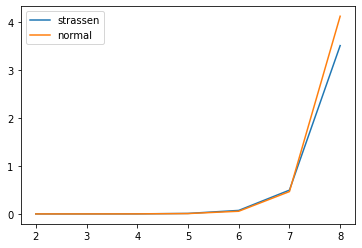

In [11]:
import numpy as np
import time

def timeit(somefunc,*args,repeats=1,**kwargs):
    times=[]
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
    error=stdev/(repeats**0.5)
 
    return (ans,mean,error)

import matplotlib.pyplot as plt

x = range(2, 9)
y1 = []
y2 = []
for n in x:
  n = 2**n
  t = [[i + j*n for i in range(n)] for j in range(n)]
  y1.append(timeit(multiply_strassen, t, t, repeats=1)[1])
  y2.append(timeit(multiply, t, t, repeats=1)[1])

plt.plot(x, y1, label='strassen')
plt.plot(x, y2, label='normal')
plt.legend(loc='upper left')
plt.show()

## End note

Fortunately we don't normally need to implement our own methods for matrix algebra.  That's why we have numpy and scipy.  Have a look at the documentation and see if you can work out how to do all of the above operations using these libraries.

## Optional extension exercise

Implement the naive methods of finding determinants and inverses of square matrices.  Can you handle 4x4 or even 5x5 matrices?  What happens to the running time as n gets larger?

For a real challenge, see if you can implement LUP decomposition.
